# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [7]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [8]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [9]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

# Close this file

h5f.close()


Check the number of images in the training and the testing dataset.

In [10]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

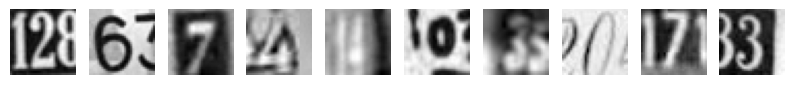

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [12]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [13]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [14]:
# Normalize inputs from 0-255 to 0-1
# Ensure X_train and X_test are arrays
#X_train = np.array(X_train)
#X_test = np.array(X_test)

In [15]:
X_train = X_train /255.0

X_test = X_test /255.0

In [16]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


Print the shapes of Training and Test data

### **One-hot encode output**

In [17]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [18]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [19]:
# Define the model

def nn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

     # First hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu', input_shape=(1024,)))

   # Second hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

     # Output layer with softmax activation for multiclass classification
    model.add(Dense(10, activation='softmax'))

    # Compile the model

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [20]:
# Create the model
nn_model = nn_model_1()



In [21]:
# Print model summary
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Assuming X_train and y_train are your training data and labels
history_model_2 = nn_model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
263/263 [==============================] - 3s 6ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 6ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

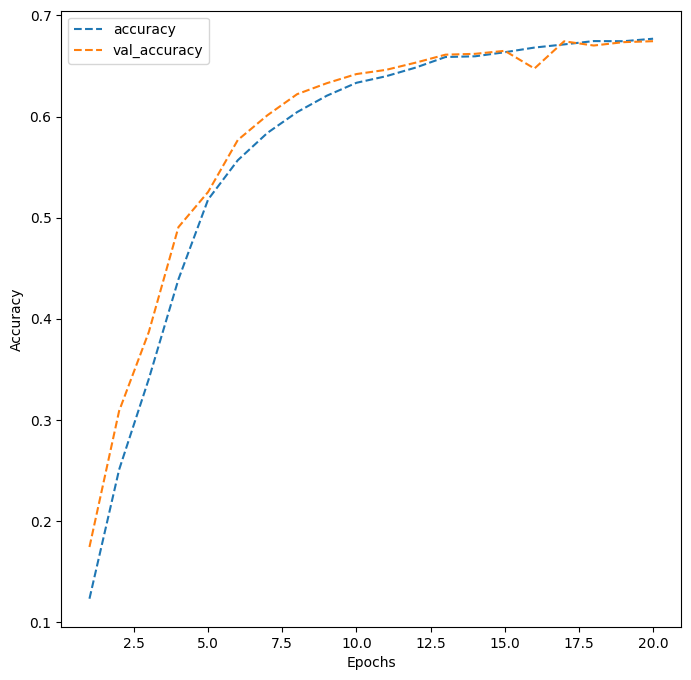

In [23]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**
Training Accuracy Trend: The plot shows how the training accuracy changes over epochs. Ideally, we expect the training accuracy to increase or plateau as the model learns from the training data. If the training accuracy continues to increase with each epoch, it suggests that the model is still learning and improving its performance on the training set.
Here we see that validation accuracy is better than the training accuracy. With the increase in epochs the validation accuracy flutuates and drops than the training accuracy. This indicates that the model is not apprpriately fitting.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [24]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [25]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [27]:
def nn_model_2():
    model = Sequential()

    # First hidden layer with 256 nodes and relu activation
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    # Second hidden layer with 128 nodes and relu activation
    model.add(Dense(128, activation='relu'))

    # Add Dropout layer with rate 0.2
    model.add(Dropout(0.2))

    # Third hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    # Fourth hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    # Fifth hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    # Add BatchNormalization layer
    model.add(BatchNormalization())

    # Output layer with softmax activation for multiclass classification
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

In [28]:
# Build the model

model_2 = nn_model_2()

In [29]:
# Print model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [30]:
history = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 15ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 3s 11ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 2.1699 - accuracy: 0.1746 - val_loss: 2.0564 - val_accuracy: 0.2769
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.6402 - accuracy: 0.4238 - val_loss: 1.4454 - val_accuracy: 0.5273
Epoch 5/30
263/263 [==============================] - 4s 16ms/step - loss: 1.3608 - accuracy: 0.5385 - val_loss: 1.3064 - val_accuracy: 0.5701
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.2484 - accuracy: 0.5870 - val_loss: 1.1214 - val_accuracy: 0.6388
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.1568 - accuracy: 0.6251 - val_loss: 1.1023 - val_accuracy: 0.6400

### **Plot the Training and Validation Accuracies and write down your Observations.**

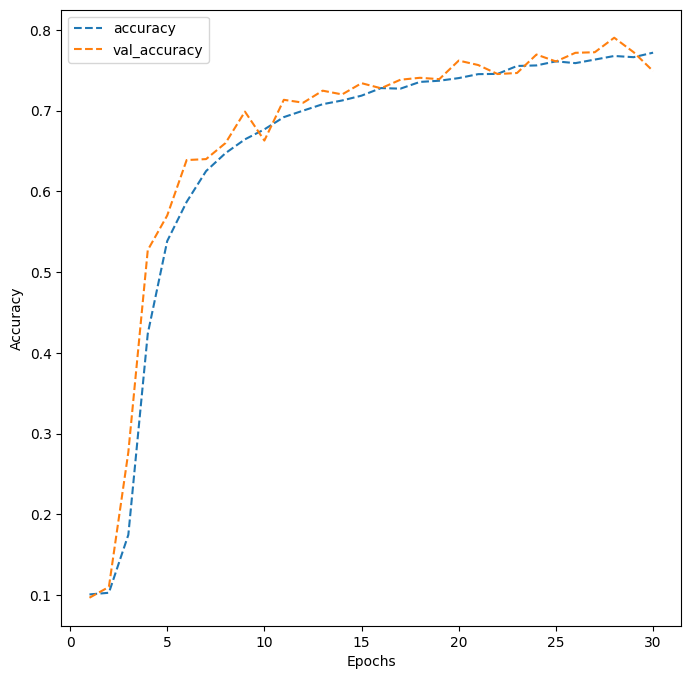

In [31]:
# Plotting the accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:_______**
The second iteration of this model seems very promising now.
The validation accuracy has improved substantially and the problem of fitting has been solved. We can say that the model is giving a generalized performance.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [32]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [33]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1814
           1       0.59      0.89      0.71      1828
           2       0.76      0.77      0.76      1803
           3       0.78      0.67      0.72      1719
           4       0.73      0.85      0.79      1812
           5       0.82      0.67      0.73      1768
           6       0.76      0.72      0.74      1832
           7       0.75      0.82      0.78      1808
           8       0.71      0.71      0.71      1812
           9       0.83      0.65      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.76      0.74      0.74     18000
weighted avg       0.76      0.74      0.74     18000



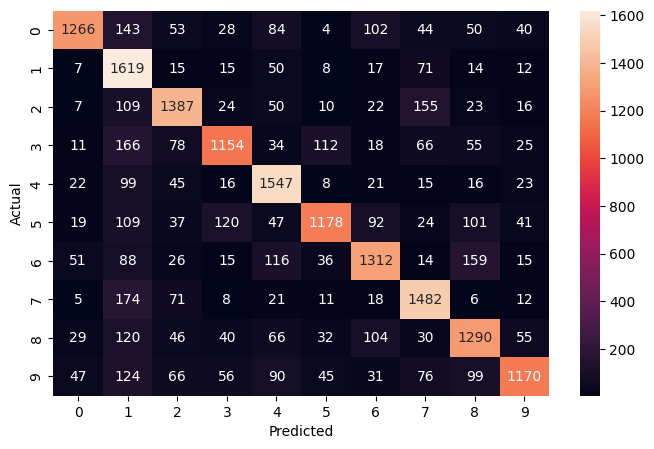

In [34]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report
# Printing the classification report
print(classification_report(y_test, test_pred))


# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**
The model is giving about 74% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a generalized performance.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [35]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [36]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
There are 42,000 images in the training data and 18,000 images in the testing data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [37]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [38]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [39]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [40]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [1]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

#y_train_encoded = to_categorical(y_train)
#y_test_encoded = to_categorical(y_test)

NameError: name 'to_categorical' is not defined

**Observation:**
Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [42]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model

def cnn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

     # First Convolutional layer with 16 filters, kernel size 3x3, and 'same' padding
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with 32 filters, kernel size 3x3, and 'same' padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

   # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer with pool size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))


    # Output layer with softmax activation
    model.add(Dense(10, activation='softmax'))


     # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [44]:
# Create the model
cnn_model_1 = cnn_model_1()

In [45]:
# Print model summary
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [47]:
# Fit the model

history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 72s 66ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 63s 60ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 63s 60ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 61s 59ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

### **Plot the Training and Validation Accuracies and Write your observations.**

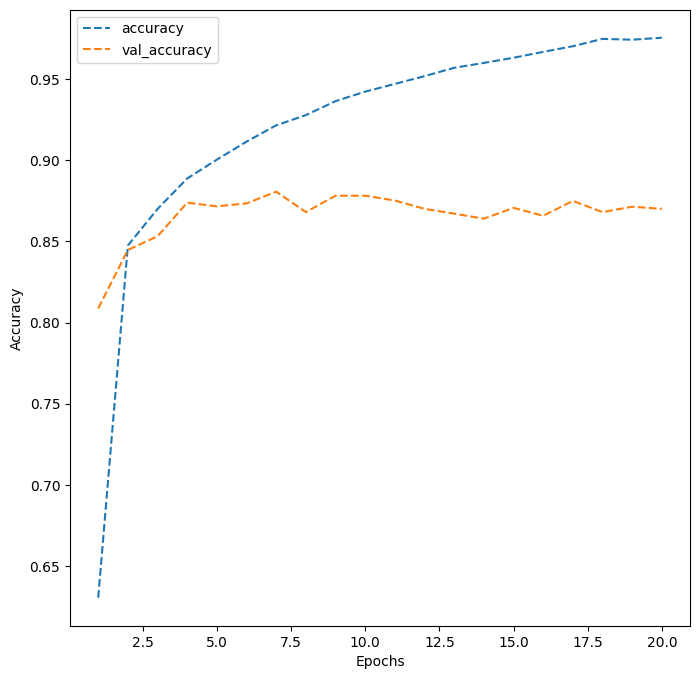

In [48]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:__________**
There is a significant gap between the two, it might indicate overfitting. A large difference suggests that the model is performing well on the training data but not as well on unseen data, which could be a sign of overfitting.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [49]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [50]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def cnn_model_2():
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, and 'same' padding
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1)))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with 32 filters, kernel size 3x3, and 'same' padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer with pool size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer with 32 filters, kernel size 3x3, and 'same' padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer with 64 filters, kernel size 3x3, and 'same' padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer with pool size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch normalization layer
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))

    # LeakyReLU layer with slope 0.1
    model.add(LeakyReLU(alpha=0.1))

    # Dropout layer with rate 0.5
    model.add(Dropout(0.5))

    # Output layer with softmax activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Create the model
cnn_model_2 = cnn_model_2()

# Print model summary
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [52]:
# Assuming X_train and y_train are your training data and labels
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 120s 450ms/step - loss: 1.3222 - accuracy: 0.5483 - val_loss: 2.1225 - val_accuracy: 0.2112
Epoch 2/30
263/263 [==============================] - 112s 425ms/step - loss: 0.6654 - accuracy: 0.7950 - val_loss: 0.6373 - val_accuracy: 0.8208
Epoch 3/30
263/263 [==============================] - 112s 427ms/step - loss: 0.5528 - accuracy: 0.8313 - val_loss: 0.4480 - val_accuracy: 0.8737
Epoch 4/30
263/263 [==============================] - 112s 425ms/step - loss: 0.4908 - accuracy: 0.8507 - val_loss: 0.3992 - val_accuracy: 0.8823
Epoch 5/30
263/263 [==============================] - 116s 440ms/step - loss: 0.4349 - accuracy: 0.8633 - val_loss: 0.3909 - val_accuracy: 0.8885
Epoch 6/30
263/263 [==============================] - 111s 421ms/step - loss: 0.4038 - accuracy: 0.8755 - val_loss: 0.4107 - val_accuracy: 0.8852
Epoch 7/30
263/263 [==============================] - 115s 439ms/step - loss: 0.3835 - accuracy: 0.8814 - val_loss: 0.3952 -

### **Plot the Training and Validation accuracies and write your observations.**

In [ ]:
history_cnn_model_2

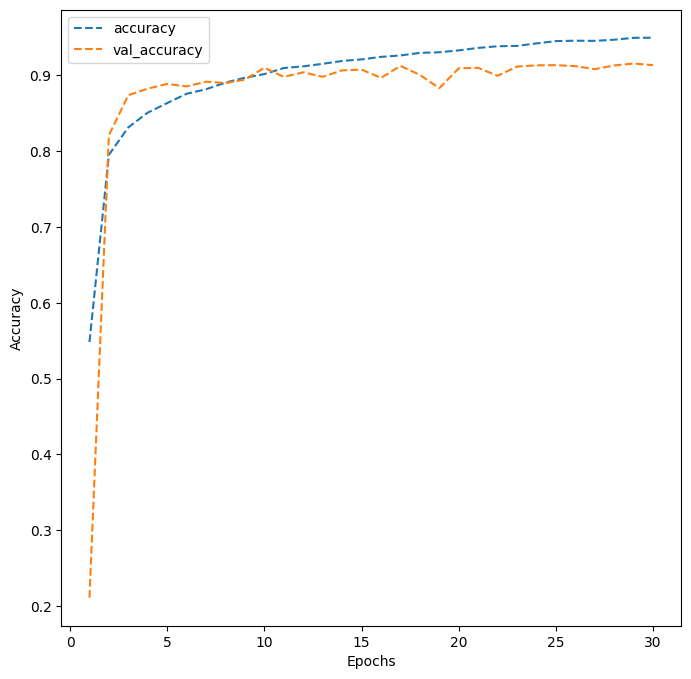

In [53]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**
The accuracy and validation accuracy are close to 90%.This is the highest in comparison to the other models. The model plateaus in approx 3 epochs. 

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [55]:
# Make predictions on the test data
test_pred = cnn_model_2.predict(X_test)

# Convert probabilities to class labels
test_pred = np.argmax(test_pred, axis=-1)



563/563 [==============================] - 18s 31ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [56]:
# Assuming y_test is your one-hot encoded labels

# Convert one-hot encoded labels to single labels
y_test = np.argmax(y_test, axis=-1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.92      0.88      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



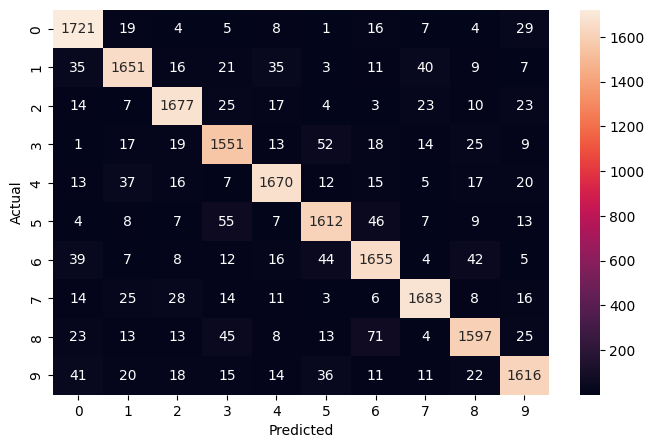

In [57]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**
We have seen two different iterations of the CNN model and two different iterations of ANN model and how to built an intuition about how to improve the model by tuning various hyperparameters and using different techniques. There is still plenty of scope for improvement and you can try out tuning different hyperparameters to improve the model performance.

Based on the results, CNN model with the drop seems the best model with 91% accuracy